## Decision Tree

In [30]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# 1. Load dataset

PATH = "/Users/moritzknodler/Documents/00_Lectures/0_Fall 2025/ML/z_Project/Flight data/thermals/thermals_weather_PCA_clusters.csv"
 
df = pd.read_csv(PATH)

print("Rows:", len(df))
display(df.head())

Rows: 7868


,thermal_id,flight_id,start_datetime,start_time,end_time,duration_s,avg_climb,max_climb,climb_std,avg_turn_radius,...,boundary_layer_height,PC1,PC2,PC3,PC4,PC5,entry_agl,exit_agl,entry_terrain_alt,cluster
0,1,3007255,2022-02-13 12:15:01,2735,3030,251,1.445575,2.6,0.631151,450955.312477,...,355.0,-3.859970,-1.348722,0.926606,1.771689,-0.895578,60.0,127.0,1608.0,3
1,2,3007255,2022-02-13 12:21:20,3114,3147,23,0.823119,1.6,0.354334,29.269215,...,355.0,-4.055338,-1.415200,0.881990,1.806916,-0.890958,274.0,287.0,1699.0,5
2,3,3007255,2022-02-13 12:25:37,3371,3463,67,1.743646,5.2,1.185881,23.452654,...,255.0,-3.867195,-1.309934,1.010626,1.762477,-0.872941,294.0,387.0,1508.0,5
3,4,3007255,2022-02-13 12:31:56,3750,3866,99,1.078976,2.4,0.563373,24.250999,...,250.0,-4.445045,-1.459673,0.587519,-0.781799,0.051703,182.0,269.0,1410.0,5
4,5,3007255,2022-02-13 12:34:43,3917,4072,99,0.863319,1.0,0.307944,-36.463323,...,250.0,-4.445045,-1.459673,0.587519,-0.781799,0.051703,240.0,247.0,1435.0,5


In [3]:
# 2. Select WEATHER FEATURES for prediction

weather_features = [
    "temperature_2m",
    "dewpoint_2m",
    "windspeed_10m",
    "winddirection_10m",
    "cloudcover_low",
    "cloudcover_mid",
    "cloudcover_high",
    "shortwave_radiation",
    "boundary_layer_height"
]

X = df[weather_features]
y = df["cluster"].astype(int)

In [4]:
# 3. Split data into training and testing sets with stratification

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("\n📌 Data Split:")
print("Train size:", len(X_train))
print("Test size:", len(X_test))
print("\nClass distribution in train:")
print(y_train.value_counts(normalize=True).round(3))


📌 Data Split:
Train size: 5901
Test size: 1967

Class distribution in train:
cluster
5    0.329
1    0.283
3    0.193
2    0.102
4    0.093
Name: proportion, dtype: float64


In [ ]:
# 4.1 CV Search Parameters to Train Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 3, 5, 8, 12, 20],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "max_features": [None, "sqrt", "log2"],
    "class_weight": [None, "balanced"]
}

grid = GridSearchCV(
    dt,
    param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.33638218478937426


In [26]:
# 4.2 Train Decision Tree Classifier

# --- Best hyperparameters found by GridSearchCV ---
dt = DecisionTreeClassifier(
    max_depth=6,        # good starting value
    min_samples_leaf=25,
    random_state=42
)

dt.fit(X_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,25
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [28]:
# 5. Evaluate model
y_pred = dt.predict(X_test)

print("\n🌲 Decision Tree Accuracy:", dt.score(X_test, y_test))

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))


🌲 Decision Tree Accuracy: 0.27656329435688864

📄 Classification Report:
              precision    recall  f1-score   support

           1       0.28      0.85      0.42       557
           2       0.00      0.00      0.00       200
           3       0.00      0.00      0.00       379
           4       0.00      0.00      0.00       184
           5       0.27      0.11      0.16       647

    accuracy                           0.28      1967
   macro avg       0.11      0.19      0.11      1967
weighted avg       0.17      0.28      0.17      1967



/Users/moritzknodler/.pyenvs/global/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/moritzknodler/.pyenvs/global/lib/python3.13/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/Users/moritzknodler/.pyenvs/global/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/moritzknodler/.pyenvs/global/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p

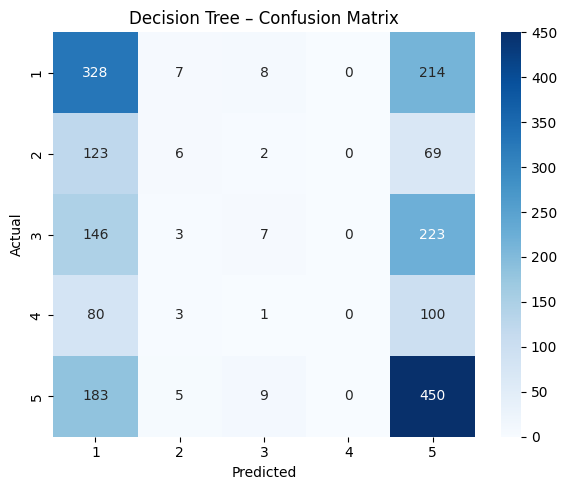

In [7]:
# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=[1,2,3,4,5],
    yticklabels=[1,2,3,4,5]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree – Confusion Matrix")
plt.tight_layout()
plt.show()

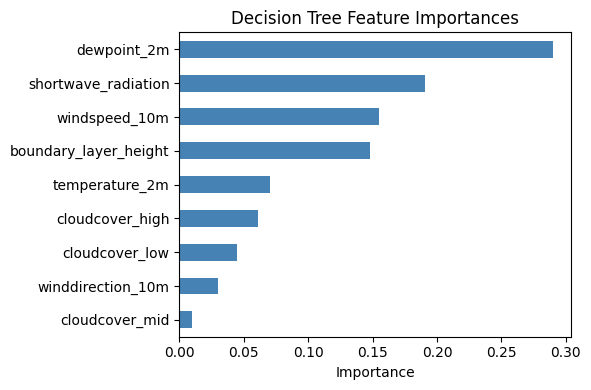

cloudcover_mid           0.010073
winddirection_10m        0.030255
cloudcover_low           0.044754
cloudcover_high          0.060796
temperature_2m           0.070532
boundary_layer_height    0.147749
windspeed_10m            0.155156
shortwave_radiation      0.190793
dewpoint_2m              0.289891
dtype: float64

In [8]:
# 7. Feature Importances
importances = pd.Series(dt.feature_importances_, index=weather_features)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(6,4))
importances.plot(kind="barh", color="steelblue")
plt.title("Decision Tree Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

importances

## Random Forest

In [31]:
# Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=2,
    class_weight="balanced_subsample",   # helps with clusters 2–4
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
y_pred = rf.predict(X_test)

print("\n🌲 Random Forest Accuracy:", rf.score(X_test, y_test))

print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))


🌲 Random Forest Accuracy: 0.4753431621759024

📄 Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.54      0.54       557
           2       0.31      0.28      0.30       200
           3       0.29      0.24      0.26       379
           4       0.15      0.15      0.15       184
           5       0.62      0.71      0.67       647

    accuracy                           0.48      1967
   macro avg       0.38      0.38      0.38      1967
weighted avg       0.46      0.48      0.47      1967



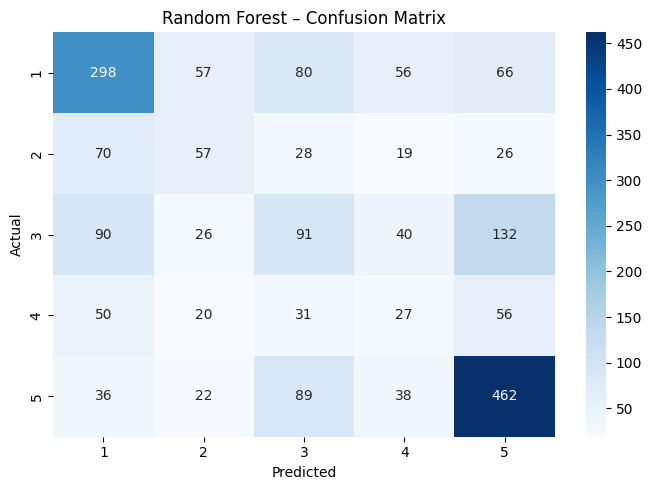

In [33]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=[1,2,3,4,5],
    yticklabels=[1,2,3,4,5]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest – Confusion Matrix")
plt.tight_layout()
plt.show()

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Base model
rf = RandomForestClassifier(random_state=42)

# Hyperparameter search space
param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [10, 20, 30, 40, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 6],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

# Randomized Search
rf_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=50,               # number of models tested
    scoring="accuracy",
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [10, 20, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,50
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [35]:
# Output best parameters and score
print("\nBest Params:", rf_search.best_params_)
print("Best CV Score:", rf_search.best_score_)


Best Params: {'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': False}
Best CV Score: 0.4868660572051837


In [36]:
# Train final model with best parameters
rf_best = rf_search.best_estimator_
rf_best.fit(X_train_scaled, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,40
,min_samples_split,20
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False



🔥 Tuned Random Forest Accuracy: 0.505338078291815

📄 Classification Report:
              precision    recall  f1-score   support

           1       0.53      0.65      0.58       557
           2       0.40      0.18      0.25       200
           3       0.29      0.16      0.20       379
           4       0.12      0.02      0.04       184
           5       0.56      0.83      0.67       647

    accuracy                           0.51      1967
   macro avg       0.38      0.37      0.35      1967
weighted avg       0.44      0.51      0.45      1967



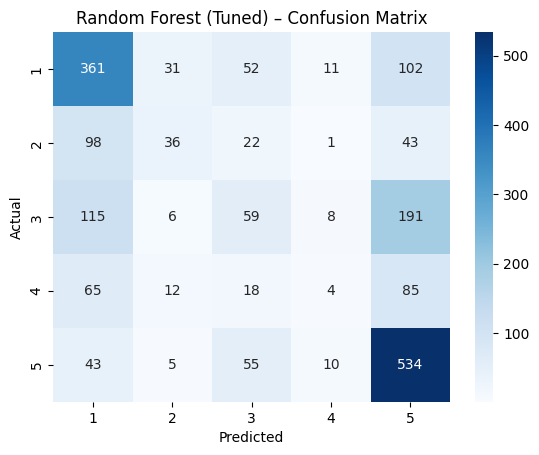

In [37]:
# Tuned Random Forest Model

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf_best.predict(X_test_scaled)

print("\n🔥 Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=sorted(y.unique()),
    yticklabels=sorted(y.unique())
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest (Tuned) – Confusion Matrix")
plt.show()

,feature,importance
0,dewpoint_2m,0.146994
1,shortwave_radiation,0.142287
2,temperature_2m,0.138618
3,boundary_layer_height,0.127963
4,windspeed_10m,0.121404
5,winddirection_10m,0.115481
6,cloudcover_mid,0.086596
7,cloudcover_high,0.066830
8,cloudcover_low,0.053828


/var/folders/zn/2ym95l4n2131dptxjp4dk3fh0000gn/T/ipykernel_76076/3742158560.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


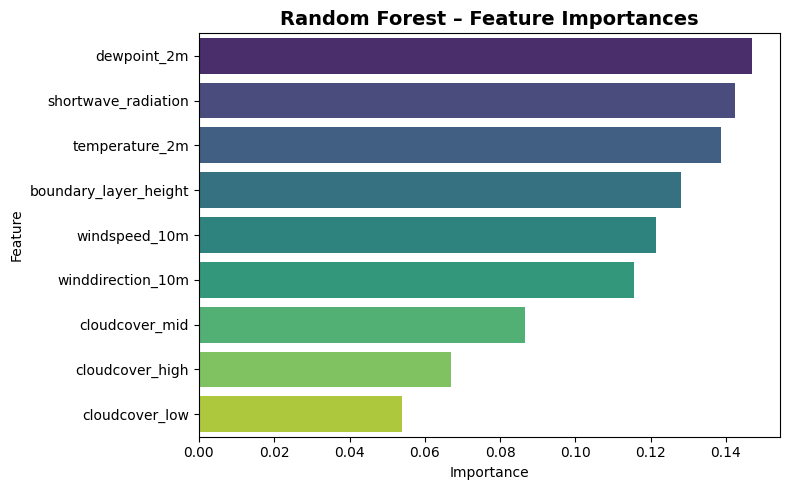

,feature,importance,importance_pct
0,dewpoint_2m,0.146994,14.70%
1,shortwave_radiation,0.142287,14.23%
2,temperature_2m,0.138618,13.86%
3,boundary_layer_height,0.127963,12.80%
4,windspeed_10m,0.121404,12.14%
5,winddirection_10m,0.115481,11.55%
6,cloudcover_mid,0.086596,8.66%
7,cloudcover_high,0.066830,6.68%
8,cloudcover_low,0.053828,5.38%


,feature,importance,std
1,dewpoint_2m,0.065633,0.004452
8,boundary_layer_height,0.059075,0.006353
7,shortwave_radiation,0.055414,0.006067
0,temperature_2m,0.051195,0.004855
3,winddirection_10m,0.024301,0.005263
2,windspeed_10m,0.019675,0.003264
6,cloudcover_high,0.017997,0.003018
5,cloudcover_mid,0.009558,0.003956
4,cloudcover_low,0.003965,0.001844


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature importances from the tuned model
importances = rf_best.feature_importances_
feature_names = X.columns

# Create a sorted DataFrame
importance_df = (
    pd.DataFrame({"feature": feature_names, "importance": importances})
    .sort_values("importance", ascending=False)
    .reset_index(drop=True)
)

display(importance_df)

plt.figure(figsize=(8, 5))

sns.barplot(
    data=importance_df,
    x="importance",
    y="feature",
    palette="viridis"
)

plt.title("Random Forest – Feature Importances", fontsize=14, weight="bold")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

importance_df["importance_pct"] = importance_df["importance"] * 100
display(importance_df.style.format({"importance_pct": "{:.2f}%"}))

from sklearn.inspection import permutation_importance

perm = permutation_importance(
    rf_best, 
    X_test_scaled, 
    y_test, 
    n_repeats=10, 
    random_state=42,
    n_jobs=-1
)

perm_df = (
    pd.DataFrame({
        "feature": feature_names,
        "importance": perm.importances_mean,
        "std": perm.importances_std
    })
    .sort_values("importance", ascending=False)
)

display(perm_df)

In [39]:
# Importance per class

from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np

feature_names = X.columns
classes = sorted(y.unique())

per_class_importance = {}

for cls in classes:
    # Define custom scorer: focus only on class cls
    def cls_accuracy(estimator, X_test, y_test, target=cls):
        y_pred = estimator.predict(X_test)
        return np.mean((y_test == target) & (y_pred == target))

    # Permutation importance for this class
    perm = permutation_importance(
        rf_best,
        X_test_scaled,
        y_test,
        scoring=cls_accuracy,
        n_repeats=10,
        random_state=42,
        n_jobs=-1
    )

    df = pd.DataFrame({
        "feature": feature_names,
        "importance": perm.importances_mean,
        "std": perm.importances_std
    }).sort_values("importance", ascending=False)

    per_class_importance[f"class_{cls}"] = df


🔍 Feature importance for Class 1:


,feature,importance,std
1,dewpoint_2m,0.031012,0.003852
8,boundary_layer_height,0.026792,0.004099
7,shortwave_radiation,0.019878,0.003993
0,temperature_2m,0.015760,0.001875
2,windspeed_10m,0.010371,0.002451
6,cloudcover_high,0.008541,0.001714
3,winddirection_10m,0.006050,0.002516
4,cloudcover_low,0.002644,0.001773
5,cloudcover_mid,-0.002593,0.003037



🔍 Feature importance for Class 2:


,feature,importance,std
1,dewpoint_2m,0.010778,0.001199
0,temperature_2m,0.010422,0.001311
8,boundary_layer_height,0.008592,0.001853
5,cloudcover_mid,0.007270,0.000852
7,shortwave_radiation,0.006507,0.001714
3,winddirection_10m,0.006355,0.001120
2,windspeed_10m,0.005440,0.001287
4,cloudcover_low,0.003711,0.000789
6,cloudcover_high,0.003101,0.000769



🔍 Feature importance for Class 3:


,feature,importance,std
8,boundary_layer_height,0.013777,0.003096
0,temperature_2m,0.011845,0.002428
3,winddirection_10m,0.010930,0.001388
1,dewpoint_2m,0.010625,0.001693
7,shortwave_radiation,0.009100,0.002064
2,windspeed_10m,0.007575,0.002312
5,cloudcover_mid,0.006812,0.001310
6,cloudcover_high,0.005186,0.001505
4,cloudcover_low,0.001525,0.001525



🔍 Feature importance for Class 4:


,feature,importance,std
1,dewpoint_2m,0.001881,0.000233
8,boundary_layer_height,0.001474,0.000480
7,shortwave_radiation,0.001271,0.000341
6,cloudcover_high,0.001169,0.000458
2,windspeed_10m,0.001068,0.000577
0,temperature_2m,0.000966,0.000531
5,cloudcover_mid,0.000915,0.000498
3,winddirection_10m,0.000458,0.000480
4,cloudcover_low,0.000356,0.000397



🔍 Feature importance for Class 5:


,feature,importance,std
7,shortwave_radiation,1.865785e-02,0.003659
0,temperature_2m,1.220132e-02,0.002622
1,dewpoint_2m,1.133706e-02,0.003493
8,boundary_layer_height,8.439248e-03,0.003792
3,winddirection_10m,5.083884e-04,0.002582
6,cloudcover_high,-2.775558e-17,0.001181
5,cloudcover_mid,-2.846975e-03,0.003296
4,cloudcover_low,-4.270463e-03,0.001918
2,windspeed_10m,-4.778851e-03,0.001674


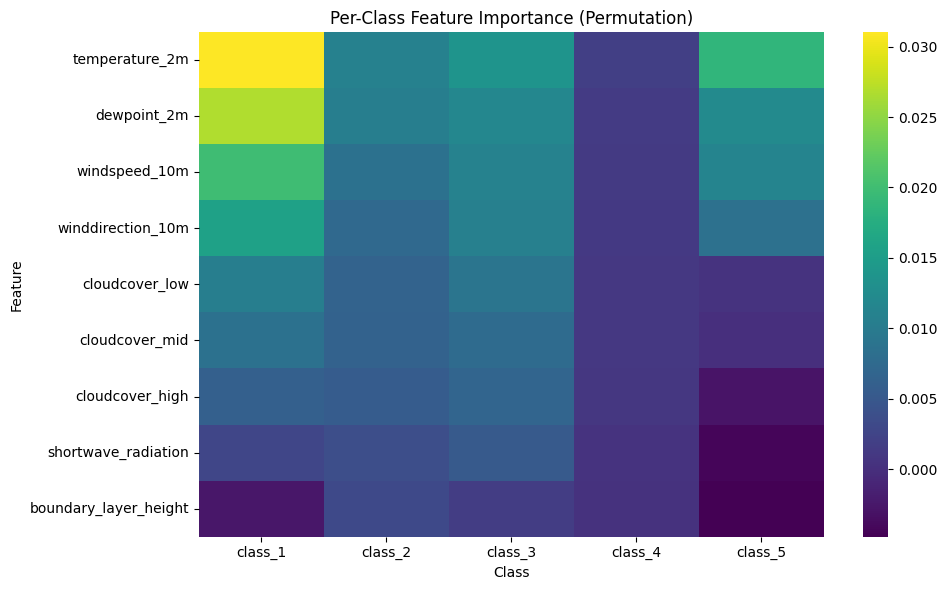

In [40]:
for cls in classes:
    print(f"\n🔍 Feature importance for Class {cls}:")
    display(per_class_importance[f"class_{cls}"].head(10))

    # Combine into single matrix
matrix = pd.DataFrame({
    f"class_{cls}": per_class_importance[f"class_{cls}"]["importance"].values
    for cls in classes
}, index=feature_names)

plt.figure(figsize=(10, 6))
sns.heatmap(matrix, annot=False, cmap="viridis")
plt.title("Per-Class Feature Importance (Permutation)")
plt.ylabel("Feature")
plt.xlabel("Class")
plt.tight_layout()
plt.show()